In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import scipy.io.wavfile
import torch
from fastai.vision import *
from fastai.metrics import error_rate

import IPython.display as ipd
from tqdm import tqdm_notebook

a

In [3]:
from fastai.vision.all import *
# Regular expression to capture the gender label
pat = re.compile(r'.*/(\w+)_(\w+)_(\d+_\d+-\d+-\d+-\d+-\d+-\d+-\d+)\.jpg')


In [4]:
from pathlib import Path
import numpy as np

path_img = "mfc_data"
fnames = list(Path(path_img).rglob('*.jpg')) + list(Path(path_img).rglob('*.jpeg')) + list(Path(path_img).rglob('*.png'))
np.random.seed(42)
np.random.shuffle(fnames)
fnames[:5]


[Path('mfc_data/Female_Actor_06_03-01-07-02-01-01-06.jpg'),
 Path('mfc_data/Female_Actor_22_03-01-02-01-01-02-22.jpg'),
 Path('mfc_data/Female_Actor_20_03-01-02-02-01-01-20.jpg'),
 Path('mfc_data/Female_Actor_04_03-01-02-01-01-02-04.jpg'),
 Path('mfc_data/Female_Actor_22_03-01-05-01-01-01-22.jpg')]

In [5]:
female_count = 0
male_count = 0

for fname in fnames:
    label = fname.stem.split('_')[0]
    if label == 'Female':
        female_count += 1
    elif label == 'Male':
        male_count += 1

print(f"Female count: {female_count}")
print(f"Male count: {male_count}")

Female count: 720
Male count: 720


['Female', 'Male']


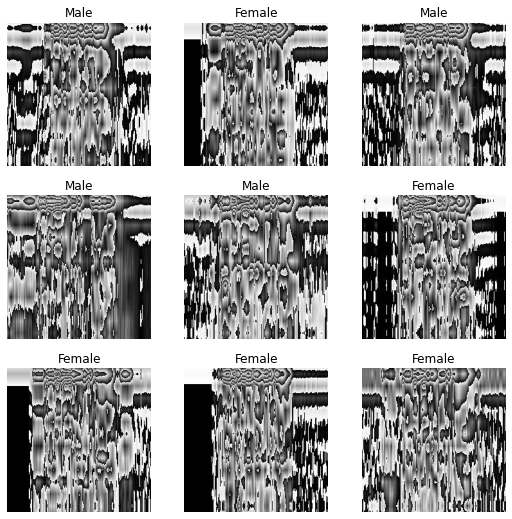

In [9]:
from fastai.vision.all import *
# Tạo DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=RegexLabeller(pat, match=1)
)

# Tạo DataLoaders
dls = dblock.dataloaders(path_img, bs=64)

# Hiển thị batch và classes
dls.show_batch()
print(dls.vocab)



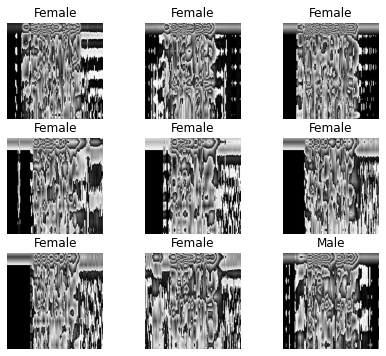

In [10]:
# Replace the old show_batch code with the following
dls.show_batch(nrows=3, ncols=3, figsize=(7,6))


In [11]:
print(dls.vocab)
print(len(dls.vocab), dls.c)


['Female', 'Male']
2 2


In [12]:
learn = cnn_learner(dls, models.resnet34, metrics=error_rate)

In [13]:
torch.cuda.is_available()

False

SuggestedLRs(valley=0.001737800776027143)

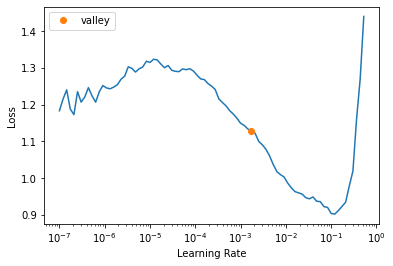

In [14]:
learn.lr_find()

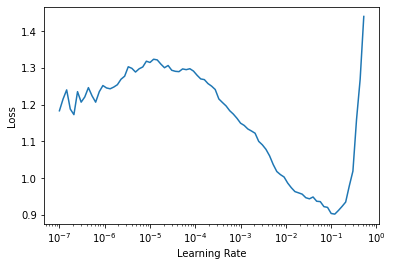

In [15]:
# Plot the learning rate finder graph
learn.recorder.plot_lr_find()

In [21]:
learn.fit_one_cycle(2, 2e-3)


epoch,train_loss,valid_loss,error_rate,time
0,0.151715,0.422957,0.055556,03:44
1,0.114261,0.578205,0.118056,03:16


In [22]:
learn.export('resnet34_step1.pkl')

In [23]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.116061,0.105036,0.027778,03:46


In [25]:
learn.export('resnet34_step2.pkl')